In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.shape

(13320, 9)

### DATA CLEANING

In [5]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df["availability"].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

#### Here we can see the majority of the data falls under a certain category , So these columns wouldn't have any impact in our model so we can drop this columns

In [7]:
df = df.drop(["area_type", "availability","balcony"], axis = 1)

#### Lets check the null values

In [8]:
df.isnull().sum()

location         1
size            16
society       5502
total_sqft       0
bath            73
price            0
dtype: int64

In [9]:
len(df[df["society"].isnull()])/len(df) * 100

41.306306306306304

In [10]:
# here 41 percentage of the column is null values so we can drop this column
df = df.drop("society", axis = 1)

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df.shape

(13246, 5)

In [14]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Feature Engineering

In [15]:
df["location"].value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [16]:
df["location"] = df["location"].str.strip()

#### Here we can find that there are so many locations having a single value so we can change the locations whose counts less than 10 to "others"

In [17]:
location_counts = df["location"].value_counts()

In [18]:
location_counts_under_10 = location_counts[location_counts<=10]

In [19]:
df["location"] = df["location"].apply(lambda x: "other" if x in location_counts_under_10 else x)

In [20]:
df["location"].value_counts()

other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

#### Here we can make a new column which gives only the size of the bhk by using a function

In [21]:
# we can make a column for bhk by using a function
def count_bhk(x):
    l = x.split(" ")
    return int(l[0])

In [22]:
df["bhk"] = df["size"].apply(count_bhk)

In [23]:
df["bhk"].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

<Axes: xlabel='bhk', ylabel='count'>

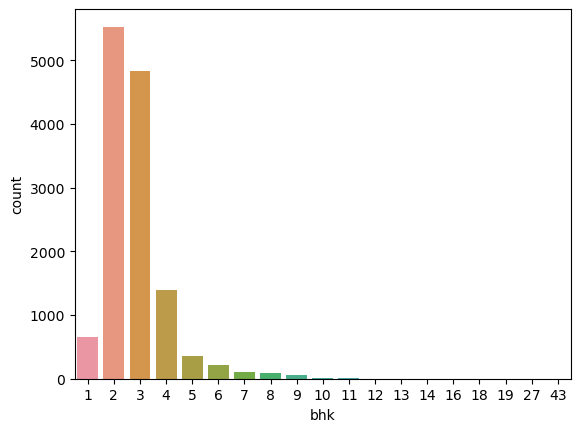

In [24]:
sns.countplot(data = df, x="bhk")

#### These values can't be possible as 8000 sqft for 27 rooms and 2400 sqft for 43 rooms so we can drop this columns

In [25]:
df[df["bhk"]>20]

,location,size,total_sqft,bath,price,bhk
1718,other,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [26]:
df = df.drop(df[df["bhk"]>20].index)

#### Now we can check the "total_sqft" feature

In [27]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### Here we can see convert all the values of total_sqft into float  by using a function

In [28]:
def convert_float(x):
    l = x.split("-")
    
    if len(l)==2:
        return (float(l[0])+float(l[1]))/2
    try :
        return float(x)
    except:
        return None
    

In [29]:
df1 = df.copy()

In [30]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [31]:
df1["total_sqft"] = df1["total_sqft"].apply(convert_float)

In [32]:
df1.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [33]:
df1.dropna(inplace=True)

In [34]:
df1["total_sqft"].describe()

count    13198.000000
mean      1554.750472
std       1236.122856
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1671.500000
max      52272.000000
Name: total_sqft, dtype: float64

#### Here we can see the min total_sqft is 1 which is not possible so, We can filter the total_sqft column by considering the minimum sqft required for  a bhk as 300 sqft

In [35]:
df1[df1["total_sqft"]/df1["bhk"]<300]

,location,size,total_sqft,bath,price,bhk
9,other,6 Bedroom,1020.0,6.0,370.0,6
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8
70,other,3 Bedroom,500.0,3.0,100.0,3
...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7
13279,other,6 Bedroom,1200.0,5.0,130.0,6
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5


In [36]:
df2 = df1[~(df1["total_sqft"]/df1["bhk"]<300)]

In [37]:
df2.shape

(12456, 6)

#### Now we can create a new feature column price_per_sqft 

In [38]:
df2["price_per_sqft"] = df2["price"]*100000 / df2["total_sqft"]

In [39]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [40]:
df2["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we can find that the difference between min and max price_per_sqft is very high , so we can clear the outliers on the basics of location using mean and standard deviation

In [41]:
def clear_outliers_price_per_sqft(df):
    
    new_df = pd.DataFrame()
    
    for location , grouped_df in df.groupby('location'):
        mean = np.mean(grouped_df["price_per_sqft"])
        std = np.std(grouped_df["price_per_sqft"])
        
        filted_df = grouped_df[(grouped_df["price_per_sqft"]>=(mean-std)) & 
                          (grouped_df["price_per_sqft"]<=(mean+std))]
        
        new_df = pd.concat([new_df,filted_df],ignore_index=True)
        
        
    return new_df
        

In [42]:
df3 = clear_outliers_price_per_sqft(df2)

In [43]:
df3.shape

(10241, 7)

In [44]:
df3["price_per_sqft"].describe()

count    10241.000000
mean      5657.702572
std       2266.476980
min       1250.000000
25%       4244.762955
50%       5172.413793
75%       6426.099852
max      24509.803922
Name: price_per_sqft, dtype: float64

### Now we can compare the prices of 2 bhk and 3 bhk based on the location

In [45]:
# we can define a function that takes a dataframe and location and plots the prices of 2bhk and 3 bhk 

def scatter_plot(df,location):
    bhk_2 = df[(df["location"] == location) & (df["bhk"]==2)]
    bhk_3= df[(df["location"] == location) & (df["bhk"]==3)]
    
    plt.figure(figsize=(10,8))
    sns.scatterplot(x="total_sqft",y = "price",data = bhk_2, color = "red", marker = "*",label = "2bhk")
    sns.scatterplot(x="total_sqft",y = "price",data = bhk_3, color = "green", marker = "+",label = "3bhk")
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()

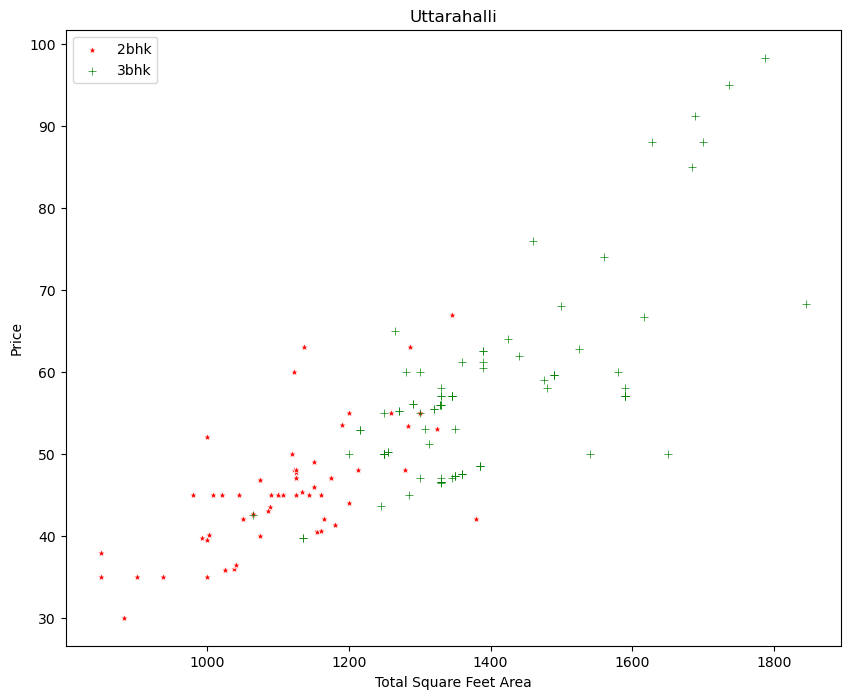

In [46]:
scatter_plot(df3,"Uttarahalli")

#### Here we can see that some bhk having same price for both 2hk and 3 bhk which is not possible ,Lets check another

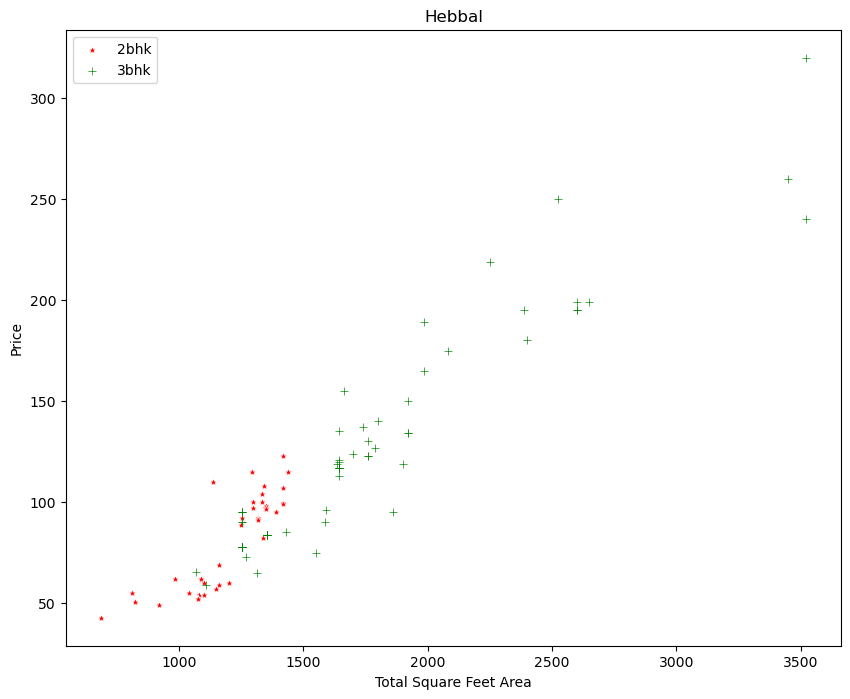

In [47]:
scatter_plot(df3,"Hebbal")

#### Here the price of 2bhk is greater than 3bhk for same location having same sqft. So we have remove all the outliers by making a dictionary for a given location and filter out the bhk(2) which is less than the mean of the bhk(1) 

In [48]:
def remove_outliers_bhk(df):
    remove_indices = np.array([])
    
    for location,df_location in df.groupby("location"):
        bhk_stats = {}
        
        for bhk,df_bhk in df_location.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean": np.mean(df_bhk["price_per_sqft"]),
                "std": np.std(df_bhk["price_per_sqft"]),
                "count": df_bhk.shape[0]
            }
        for bhk,df_bhk in df_location.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if (stats and stats["count"]>5):
                remove_indices = np.append(remove_indices, df_bhk[df_bhk["price_per_sqft"]<(stats["mean"])].index.values)
    return df.drop(remove_indices,axis = "index")
            

In [49]:
df4 = remove_outliers_bhk(df3)

In [50]:
df4.shape

(7329, 7)

#### Now we can again plot the visuals 

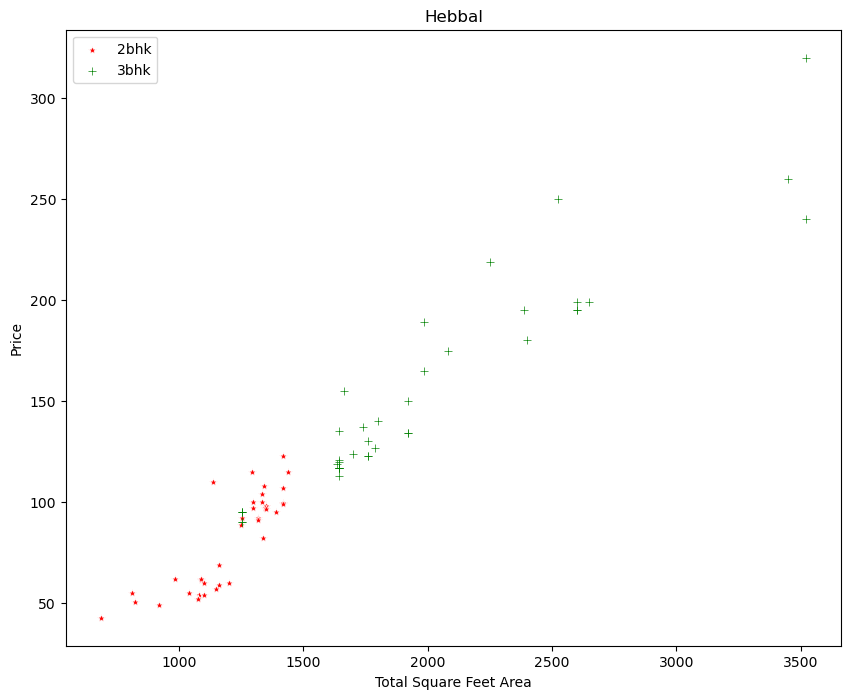

In [51]:
scatter_plot(df4,"Hebbal")

#### Now we can most of the outliers are gone and now we can check the distribution of price_per_sqft

<Axes: xlabel='price_per_sqft', ylabel='Count'>

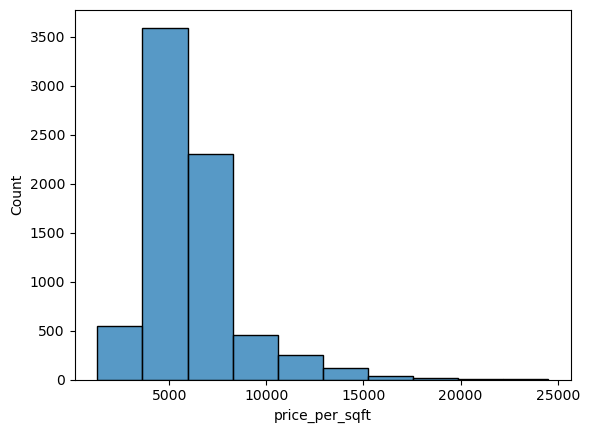

In [52]:
sns.histplot(x = "price_per_sqft", data = df4 ,bins =10)

#### Now we can check the Bathroom feature

In [53]:
df4["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [54]:
df4[df4["bath"]>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


#### Here we can see bhk with more bathrooms than rooms which is not so common , So we can filter those

In [55]:
df4[df4["bath"]>df4["bhk"]+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [56]:
# we can drop this rows
df5 = df4[~(df4["bath"]>df4["bhk"]+2)]

In [57]:
df5.shape

(7325, 7)

In [58]:
df6 = df5.drop(["size","price_per_sqft"],axis = 1)

### MODEL BUILDING

In [59]:
df6

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


### BY USING ONE HOT ENCODING

In [60]:
dummies = pd.get_dummies(df6["location"])

In [61]:
df7 = pd.concat([df6,dummies.drop("other",axis=1)],axis = 1)

In [62]:
df7

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Selecting X and y values

In [63]:
X = df7.drop(["price","location"],axis =1)
y = df7["price"]

In [64]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7325, dtype: float64

#### TRAIN TEST SPLIT

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [68]:
X_train

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
5537,680.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3360,2400.0,5.0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,1240.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4689,1238.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4333,1250.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422,1653.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6463,1277.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6692,2030.0,4.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016,1475.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
y_train

5537      32.64
3360     250.00
748       59.52
4689      55.00
4333      68.75
          ...  
6422      85.00
6463      55.00
6692     125.00
1016      74.00
10120    140.00
Name: price, Length: 5860, dtype: float64

#### We can use linear regression 

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()

In [72]:
model.fit(X_train, y_train)

LinearRegression()

In [73]:
model.score(X_test,y_test)

0.8111849311776151

#### Here our model score is 81 percentage , Now we can make a function to predict the house price

In [74]:
def predict_price(location,sqft,bath,bhk):    
    location_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if location_index >= 0:
        x[location_index] = 1
        
    return model.predict([x])[0]

In [75]:
predict_price('1st Block Jayanagar',1000,2,2)

178.52386325305503

In [76]:
predict_price("Devarachikkanahalli",1000,2,2)

38.867087757460816

In [77]:
import pickle

with open('banglore_house_price_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)